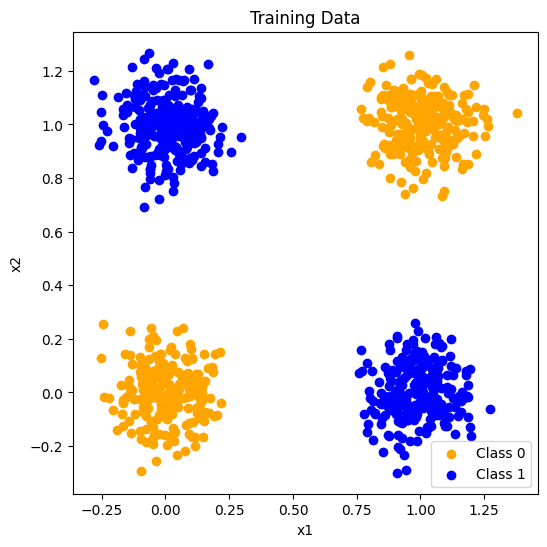

Epoch 1/20, Validation Loss: 0.6887
Epoch 2/20, Validation Loss: 0.6812
Epoch 3/20, Validation Loss: 0.6653
Epoch 4/20, Validation Loss: 0.6308
Epoch 5/20, Validation Loss: 0.5685
Epoch 6/20, Validation Loss: 0.4847
Epoch 7/20, Validation Loss: 0.3882
Epoch 8/20, Validation Loss: 0.2913
Epoch 9/20, Validation Loss: 0.2133
Epoch 10/20, Validation Loss: 0.1590
Epoch 11/20, Validation Loss: 0.1231
Epoch 12/20, Validation Loss: 0.0981
Epoch 13/20, Validation Loss: 0.0806
Epoch 14/20, Validation Loss: 0.0678
Epoch 15/20, Validation Loss: 0.0582
Epoch 16/20, Validation Loss: 0.0505
Epoch 17/20, Validation Loss: 0.0446
Epoch 18/20, Validation Loss: 0.0397
Epoch 19/20, Validation Loss: 0.0357
Epoch 20/20, Validation Loss: 0.0323


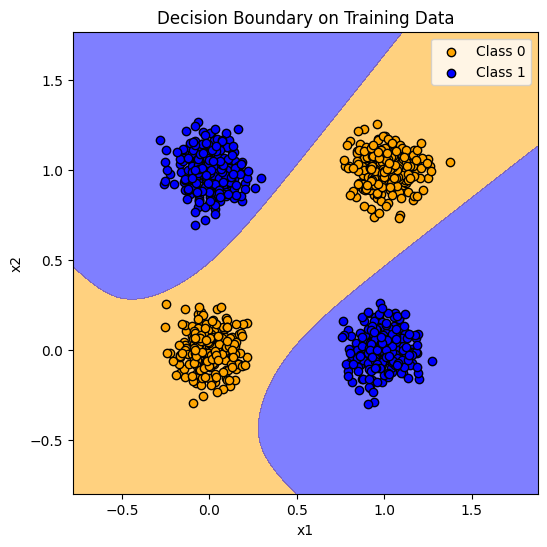

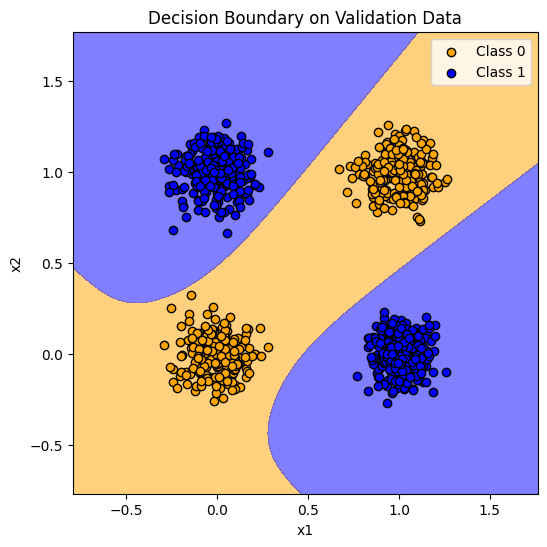


Testing model with depth 0 and width 1
Repeat 1/5, Test Loss: 0.6944
Repeat 2/5, Test Loss: 0.6980
Repeat 3/5, Test Loss: 0.6933
Repeat 4/5, Test Loss: 0.6933
Repeat 5/5, Test Loss: 0.6934

Testing model with depth 0 and width 2
Repeat 1/5, Test Loss: 0.6947
Repeat 2/5, Test Loss: 0.6927
Repeat 3/5, Test Loss: 0.6944
Repeat 4/5, Test Loss: 0.6931
Repeat 5/5, Test Loss: 0.6952

Testing model with depth 0 and width 3
Repeat 1/5, Test Loss: 0.6950
Repeat 2/5, Test Loss: 0.7013
Repeat 3/5, Test Loss: 0.6954
Repeat 4/5, Test Loss: 0.6960
Repeat 5/5, Test Loss: 0.6929

Testing model with depth 1 and width 1
Repeat 1/5, Test Loss: 0.4852
Repeat 2/5, Test Loss: 0.5004
Repeat 3/5, Test Loss: 0.5422
Repeat 4/5, Test Loss: 0.5154
Repeat 5/5, Test Loss: 0.4988

Testing model with depth 1 and width 2
Repeat 1/5, Test Loss: 0.3505
Repeat 2/5, Test Loss: 0.3518
Repeat 3/5, Test Loss: 0.3672
Repeat 4/5, Test Loss: 0.5937
Repeat 5/5, Test Loss: 0.3447

Testing model with depth 1 and width 3
Repeat 1/5

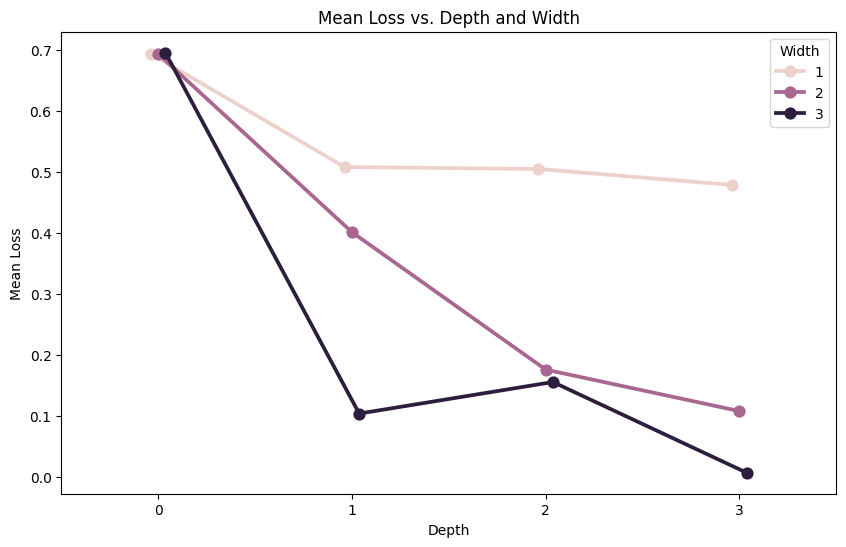

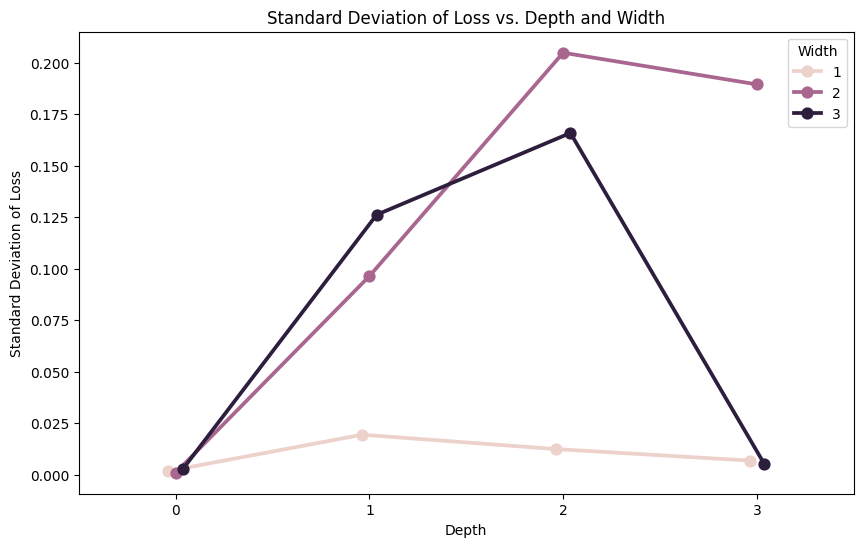

In [2]:
# feedforwardAssignment.ipynb

# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.optim as optim

# Data generation class for the noisy XOR problem
class NoisyXORDataset(Dataset):
    def __init__(self, n_samples=1000, s=0.1):
        self.n_samples = n_samples
        self.s = s
        self.data = []
        self.targets = []
        self.generate_data()
        
    def generate_data(self):
        m_list = [(0, 0), (0, 1), (1, 0), (1, 1)]
        for _ in range(self.n_samples):
            m1, m2 = m_list[np.random.randint(0, 4)]
            eta1, eta2 = np.random.randn(2)
            x1 = m1 + self.s * eta1
            x2 = m2 + self.s * eta2
            y = m1 ^ m2  # XOR operation
            self.data.append([x1, x2])
            self.targets.append(y)
        self.data = np.array(self.data, dtype=np.float32)
        self.targets = np.array(self.targets, dtype=np.float32)
        
    def __len__(self):
        return self.n_samples
    
    def __getitem__(self, idx):
        return self.data[idx], self.targets[idx]
    
# Original Model class implementing the feed-forward neural network
class FeedforwardNN(nn.Module):
    def __init__(self):
        super(FeedforwardNN, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(2, 3, bias=True),
            nn.Tanh(),
            nn.Linear(3, 1, bias=True),
            nn.Identity()
        )
        
    def forward(self, x):
        return self.model(x)
    
# Visualization functions
def plot_data(dataset, title):
    data = dataset.data
    targets = dataset.targets
    plt.figure(figsize=(6,6))
    plt.scatter(data[targets==0, 0], data[targets==0, 1], color='orange', label='Class 0')
    plt.scatter(data[targets==1, 0], data[targets==1, 1], color='blue', label='Class 1')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.legend()
    plt.title(title)
    plt.show()
    
def plot_decision_boundary(model, dataset, title):
    x_min, x_max = dataset.data[:, 0].min() - 0.5, dataset.data[:, 0].max() + 0.5
    y_min, y_max = dataset.data[:, 1].min() - 0.5, dataset.data[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))
    grid = np.c_[xx.ravel(), yy.ravel()]
    grid_tensor = torch.from_numpy(grid).float()
    with torch.no_grad():
        outputs = model(grid_tensor)
        probs = torch.sigmoid(outputs).numpy()
    probs = probs.reshape(xx.shape)
    
    plt.figure(figsize=(6,6))
    plt.contourf(xx, yy, probs, levels=[0, 0.5, 1], colors=['orange', 'blue'], alpha=0.5)
    plt.scatter(dataset.data[dataset.targets==0, 0], dataset.data[dataset.targets==0, 1], color='orange', edgecolor='k', label='Class 0')
    plt.scatter(dataset.data[dataset.targets==1, 0], dataset.data[dataset.targets==1, 1], color='blue', edgecolor='k', label='Class 1')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.legend()
    plt.title(title)
    plt.show()

# Generate training and validation datasets
train_dataset = NoisyXORDataset(n_samples=1000, s=0.1)
val_dataset = NoisyXORDataset(n_samples=1000, s=0.1)

# Plot training data
plot_data(train_dataset, 'Training Data')

# Original model training (for the first two tasks)
# Create DataLoaders for mini-batch learning
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

# Initialize the model, loss function, and optimizer
model = FeedforwardNN()
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Training loop with mini-batch learning
num_epochs = 20

for epoch in range(num_epochs):
    model.train()
    for batch_idx, (data, targets) in enumerate(train_loader):
        optimizer.zero_grad()
        outputs = model(data)
        targets = targets.unsqueeze(1)  # Reshape targets to [batch_size, 1]
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
    
    # Evaluate on validation set
    model.eval()
    with torch.no_grad():
        val_loss = 0
        for data, targets in val_loader:
            outputs = model(data)
            targets = targets.unsqueeze(1)
            loss = criterion(outputs, targets)
            val_loss += loss.item()
        val_loss /= len(val_loader)
    print(f'Epoch {epoch+1}/{num_epochs}, Validation Loss: {val_loss:.4f}')

# Plot decision boundary on training data
plot_decision_boundary(model, train_dataset, 'Decision Boundary on Training Data')

# Plot decision boundary on validation data
plot_decision_boundary(model, val_dataset, 'Decision Boundary on Validation Data')

# ---------------------------------------------------------------------------
# Update: Testing a Range of Networks with Different Depths and Widths
# ---------------------------------------------------------------------------

import itertools
import pandas as pd

# Define the range of depths and widths
depths = [0, 1, 2, 3]  # Number of hidden layers
widths = [1, 2, 3]     # Units per hidden layer

# Function to create a model with given depth and width
def create_model(input_size, output_size, hidden_layers, hidden_units):
    layers = []
    in_features = input_size
    for _ in range(hidden_layers):
        layers.append(nn.Linear(in_features, hidden_units))
        layers.append(nn.Tanh())
        in_features = hidden_units
    layers.append(nn.Linear(in_features, output_size))
    layers.append(nn.Identity())
    return nn.Sequential(*layers)

# Initialize a DataFrame to store results
results = []

# Number of times to repeat training for each configuration
repeats = 5

# Loop over all combinations of depths and widths
for depth, width in itertools.product(depths, widths):
    print(f'\nTesting model with depth {depth} and width {width}')
    losses = []
    for repeat in range(repeats):
        # Create new datasets for each repeat
        train_dataset = NoisyXORDataset(n_samples=1000, s=0.1)
        val_dataset = NoisyXORDataset(n_samples=1000, s=0.1)
        train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
        val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
        
        # Create the model
        model = create_model(input_size=2, output_size=1, hidden_layers=depth, hidden_units=width)
        
        # Define loss function and optimizer
        criterion = nn.BCEWithLogitsLoss()
        optimizer = optim.Adam(model.parameters(), lr=0.01)
        
        # Training loop
        num_epochs = 20
        for epoch in range(num_epochs):
            model.train()
            for data, targets in train_loader:
                optimizer.zero_grad()
                outputs = model(data)
                targets = targets.unsqueeze(1)
                loss = criterion(outputs, targets)
                loss.backward()
                optimizer.step()
        
        # Evaluate on a new dataset
        test_dataset = NoisyXORDataset(n_samples=1000, s=0.1)
        test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
        model.eval()
        with torch.no_grad():
            test_loss = 0
            for data, targets in test_loader:
                outputs = model(data)
                targets = targets.unsqueeze(1)
                loss = criterion(outputs, targets)
                test_loss += loss.item()
            test_loss /= len(test_loader)
        losses.append(test_loss)
        print(f'Repeat {repeat+1}/{repeats}, Test Loss: {test_loss:.4f}')
    
    mean_loss = np.mean(losses)
    std_loss = np.std(losses)
    results.append({'Depth': depth, 'Width': width, 'Mean Loss': mean_loss, 'Std Loss': std_loss})

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Display the results
print('\nResults:')
print(results_df)

# Visualize the results
import seaborn as sns

# Plot Mean Loss vs. Depth and Width
plt.figure(figsize=(10,6))
sns.pointplot(data=results_df, x='Depth', y='Mean Loss', hue='Width', dodge=True, markers='o', linestyles='-')
plt.title('Mean Loss vs. Depth and Width')
plt.ylabel('Mean Loss')
plt.show()

# Plot Std Loss vs. Depth and Width
plt.figure(figsize=(10,6))
sns.pointplot(data=results_df, x='Depth', y='Std Loss', hue='Width', dodge=True, markers='o', linestyles='-')
plt.title('Standard Deviation of Loss vs. Depth and Width')
plt.ylabel('Standard Deviation of Loss')
plt.show()
